In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
import cx_Oracle
from sqlalchemy import create_engine
import os
from PIL import Image

In [20]:
okt = Okt()

In [21]:
stopwords = ['투자', '주가', '주식', '가능성', '거래', '보고', '수익', '오늘', '사람', '시장',
             '올해', '내년', '국내', '해외', '기업', '실적', '성장', '매출', '영업', '기대',
             '손실', '차트', '분석', '정보', '데이터', '종목', '변동', '영향', '변화', '예측']


In [22]:
# 🔹 Oracle DB 연결 (SQLAlchemy 사용)
db_user = "c##PROJECT"
db_password = "k5002"
db_host = "localhost"
db_port = "1521"
db_service = "xe"

In [23]:
engine = create_engine(f"oracle+cx_oracle://{db_user}:{db_password}@{db_host}:{db_port}/?service_name={db_service}")

In [24]:
# 🔹 DB에서 뉴스와 커뮤니티 토큰 데이터 가져오기
query = """
    SELECT NEWS_TOKEN FROM NEWS
    UNION ALL
    SELECT CONTENT_TOKEN FROM COMMUNITY
"""
df = pd.read_sql(query, con=engine)

In [25]:
df = df.dropna()
text_data = ' '.join(df.iloc[:, 0]) 

In [26]:
# 🔹 명사 추출 함수
def extract_nouns(text):
    nouns = okt.nouns(text)  # 명사 추출
    return ' '.join(nouns)  # 공백으로 연결하여 반환

In [27]:
# 🔹 명사 추출 및 불용어 제거
text_data = extract_nouns(text_data)
words = text_data.split()
filtered_words = [word for word in words if word not in stopwords]
word_counts = Counter(filtered_words)

In [35]:
# ✅ 올바른 이미지 저장 경로 (`finalproject/fastapi/app/images/wordcloud`)
BASE_DIR = os.getcwd()
IMAGE_DIR = os.path.join(BASE_DIR, "..", "fastapi", "app", "images", "wordcloud")  # ✅ 경로 변경
os.makedirs(IMAGE_DIR, exist_ok=True)  # 폴더가 없으면 생성

# ✅ 마스크 이미지 경로 설정
circle_mask_path = os.path.join(IMAGE_DIR, "circle_mask.png")

In [36]:
# ✅ 원형 마스크 생성 함수
def create_circle_mask(size=(300, 300)):  # ✅ 300x300 크기로 최적화
    mask = np.zeros(size, dtype=np.uint8)
    center = (size[0] // 2, size[1] // 2)
    radius = min(size) // 2
    y, x = np.ogrid[:size[0], :size[1]]
    mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= radius ** 2
    mask[mask_area] = 255
    return mask

In [37]:
# ✅ 마스크 이미지가 없으면 생성
if not os.path.exists(circle_mask_path):
    circle_mask = create_circle_mask()
    Image.fromarray(circle_mask).save(circle_mask_path)

In [38]:

# ✅ 마스크 이미지 로드 (색상 반전)
circle_mask = np.array(Image.open(circle_mask_path).convert("L"))
circle_mask = 255 - circle_mask  # ✅ 색상 반전 (검은색이 글자가 배치될 영역)

In [39]:
# 🔹 워드 클라우드 생성
font_path = r'C:\Windows\Fonts\malgun.ttf'  # 한글 폰트 경로 (Windows 기준)
wordcloud = WordCloud(
    font_path=font_path,
    width=300, height=300,
    background_color='white',
    max_words=30,
    min_font_size=10,  # ✅ 최소 글자 크기 조정
    max_font_size=50,  # ✅ 최대 글자 크기 제한
    min_word_length=2,
    random_state=2024,
    mask=circle_mask  # ✅ 원형 마스크 적용
).generate_from_frequencies(word_counts)

In [40]:
wordcloud_path = os.path.join(IMAGE_DIR, "wordcloud.png")
wordcloud.to_file(wordcloud_path)
print(f"✅ 워드 클라우드가 저장되었습니다: {wordcloud_path}")

✅ 워드 클라우드가 저장되었습니다: d:\kdt\finalproject\wordcloud\..\fastapi\app\images\wordcloud\wordcloud.png


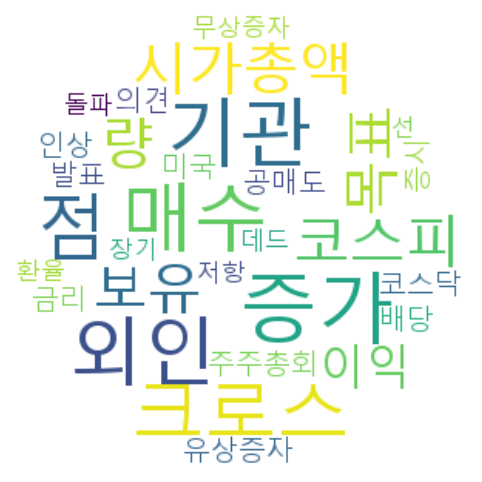

In [17]:
# 🔹 워드 클라우드 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
# 🔹 상위 50개 단어 출력
print("\n🔹 상위 5 카운트 단어")
for word, count in word_counts.most_common(5):
    print(f"{word}: {count}")


🔹 상위 5 카운트 단어
증가: 1508
매수: 1381
외인: 1362
기관: 1341
크로스: 1276
